In [11]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
import glob

# Chemin vers les fichiers Excel
chemin = "C:\\Users\\MM_DATA\\Desktop\\PIST\\Prediction\\STE\\Etat_des_sorties_année_*.xlsx"

# Liste des noms de fichiers Excel
noms_fichiers = glob.glob(chemin)

# Initialiser une liste pour stocker les DataFrames
dfs = []

# Lire chaque fichier Excel et le charger dans un DataFrame
for nom_fichier in noms_fichiers:
    df = pd.read_excel(nom_fichier, skiprows=2)  # Ignorer les deux premières lignes
    dfs.append(df)

# Concaténer tous les DataFrames en un seul
df_agregat = pd.concat(dfs, ignore_index=True)

# Afficher les premières lignes du DataFrame agrégé
print(df_agregat.head())


   N° B.C  N° B.L                                  MARKETER  N° B.E.C  \
0    8943    8355  TOTALENERGIES MARKETING TOGO              30427577   
1    8944    8356  TOTALENERGIES MARKETING TOGO              30427578   
2    8945    8357  TOTALENERGIES MARKETING TOGO              30427578   
3    8946    8358  TOTALENERGIES MARKETING TOGO              30427579   
4    8947    8359  TOTALENERGIES MARKETING TOGO              30427580   

                               DESTINATAIRE  \
0  TOTALENERGIES HIHEATRO                     
1  TOTALENERGIES TEMEDJA                      
2  TOTALENERGIES TEMEDJA                      
3  FAT 3E RI-TEMEDJA                          
4  TOTALENERGIES ANIE 1                       

                                    PRODUIT       DATE  \
0  SUPER                                    2019-01-03   
1  SUPER                                    2019-01-03   
2  GASOIL                                   2019-01-03   
3  GASOIL                                   20

In [4]:
# Supprimer les lignes avec des valeurs manquantes ou invalides
df_agregat = df_agregat.dropna()  # Supprimer les lignes avec des valeurs manquantes
df_agregat = df_agregat[df_agregat['VOLUME'] > 0]  # Supprimer les lignes avec un volume négatif ou nul

# Afficher la forme (shape) du DataFrame après le nettoyage
print("Shape du DataFrame après nettoyage :", df_agregat.shape)


Shape du DataFrame après nettoyage : (301392, 13)


In [5]:
# Afficher un aperçu des données nettoyées
print("Aperçu des données nettoyées :")
print(df_agregat.head())


Aperçu des données nettoyées :
   N° B.C  N° B.L                                  MARKETER  N° B.E.C  \
0    8943    8355  TOTALENERGIES MARKETING TOGO              30427577   
1    8944    8356  TOTALENERGIES MARKETING TOGO              30427578   
2    8945    8357  TOTALENERGIES MARKETING TOGO              30427578   
3    8946    8358  TOTALENERGIES MARKETING TOGO              30427579   
4    8947    8359  TOTALENERGIES MARKETING TOGO              30427580   

                               DESTINATAIRE  \
0  TOTALENERGIES HIHEATRO                     
1  TOTALENERGIES TEMEDJA                      
2  TOTALENERGIES TEMEDJA                      
3  FAT 3E RI-TEMEDJA                          
4  TOTALENERGIES ANIE 1                       

                                    PRODUIT       DATE  \
0  SUPER                                    2019-01-03   
1  SUPER                                    2019-01-03   
2  GASOIL                                   2019-01-03   
3  GASOIL      

In [9]:
# Enregistrer le DataFrame nettoyé dans un fichier Excel
chemin_sortie = "C:\\Users\\MM_DATA\\Desktop\\PIST\\Prediction\\Etat_des_sorties_final.xlsx"
df_agregat.to_excel(chemin_sortie, index=False)

print("Le fichier Excel final a été enregistré avec succès à l'emplacement suivant :", chemin_sortie)


Le fichier Excel final a été enregistré avec succès à l'emplacement suivant : C:\Users\MM_DATA\Desktop\PIST\Prediction\Etat_des_sorties_final.xlsx


## prediction

Zone: ZONE 5                                  
Mean Squared Error: 25149667.478866916


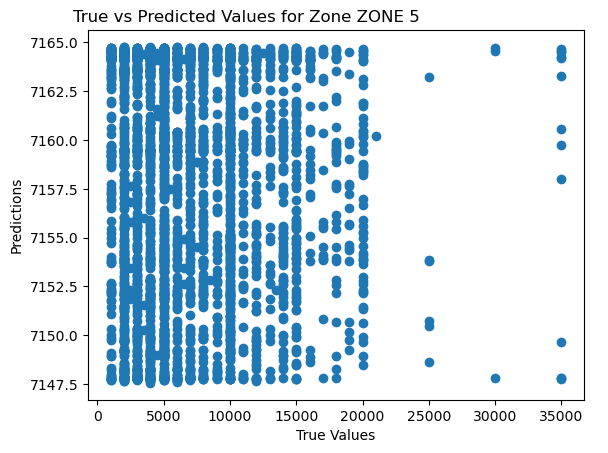

Zone: ZONE 8                                  
Mean Squared Error: 39768418.55212606


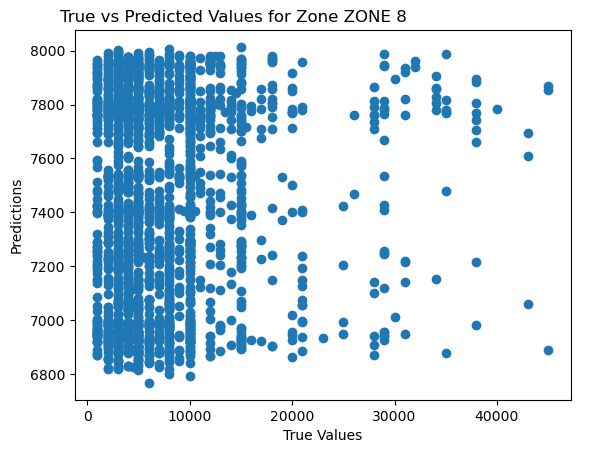

Zone: ZONE 2                                  
Mean Squared Error: 53388683.145925574


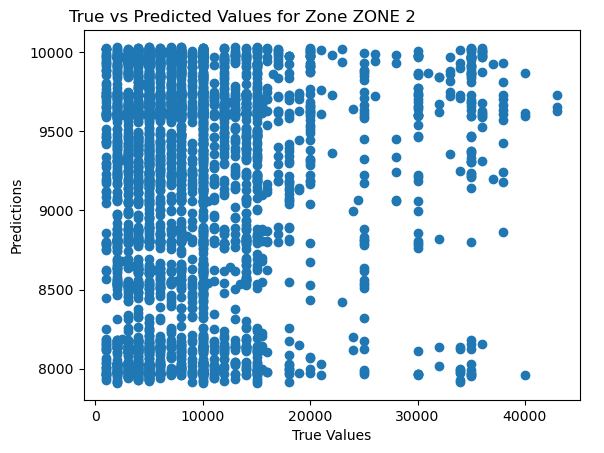

Zone: ZONE 13                                 
Mean Squared Error: 114197943.8442285


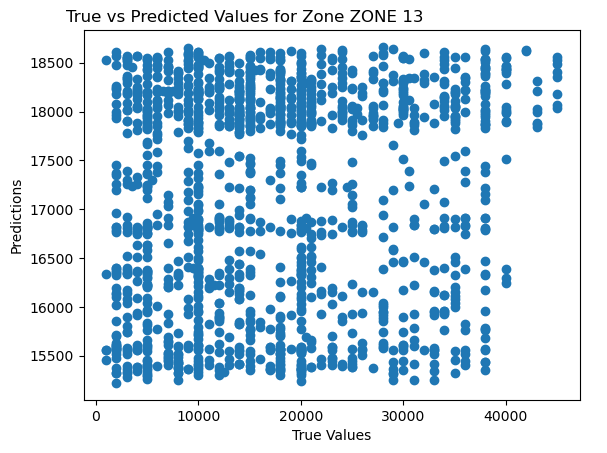

Zone: ZONE 1                                  
Mean Squared Error: 109759344.88190512


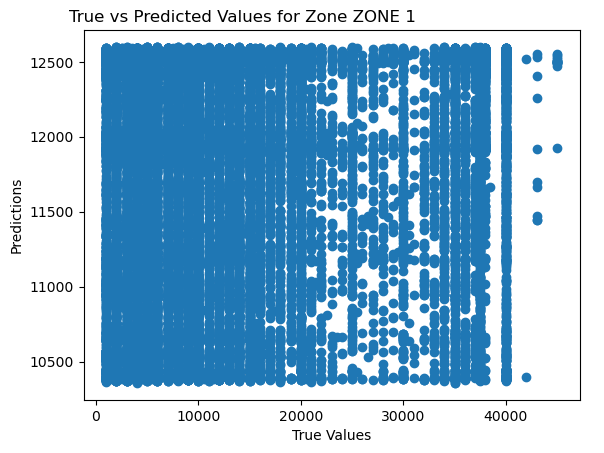

Zone: ZONE 12                                 
Mean Squared Error: 84729650.39589614


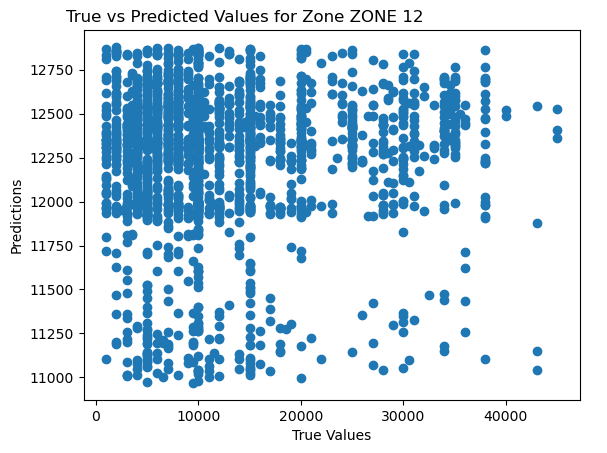

Zone: ZONE 4                                  
Mean Squared Error: 43460469.15372408


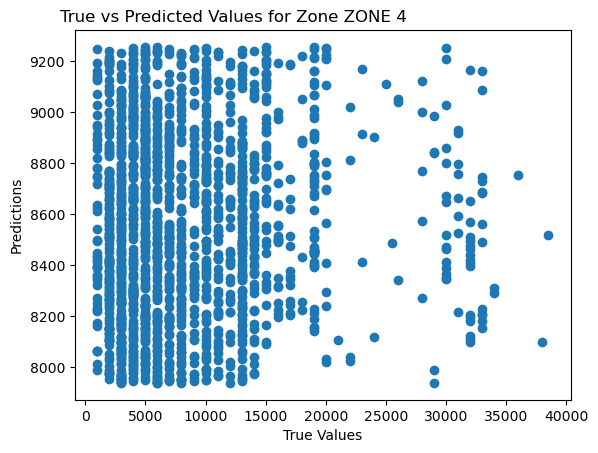

Zone: ZONE 9                                  
Mean Squared Error: 37053632.128684536


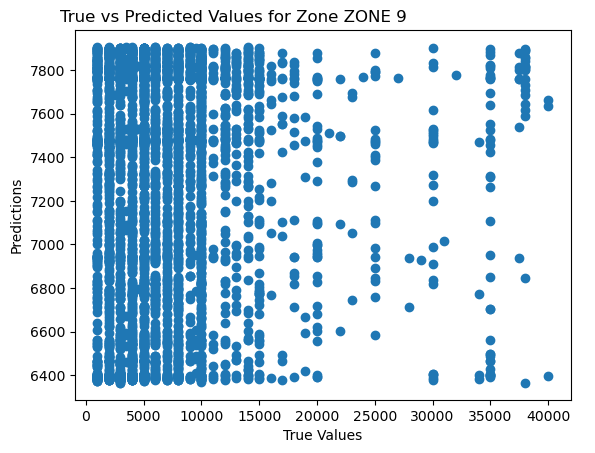

Zone: ZONE 6                                  
Mean Squared Error: 10473180.332964607


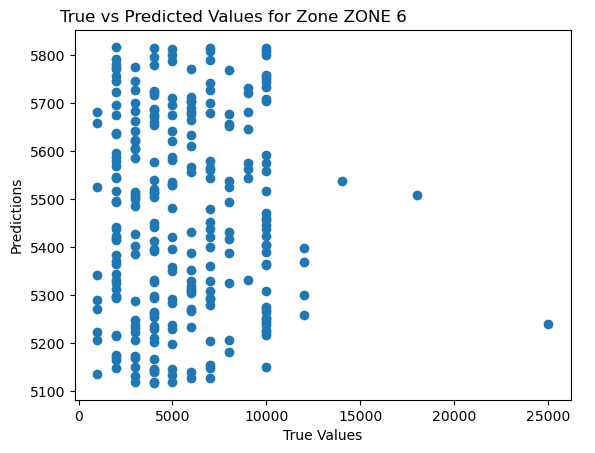

Zone: ZONE 3                                  
Mean Squared Error: 99102058.29991488


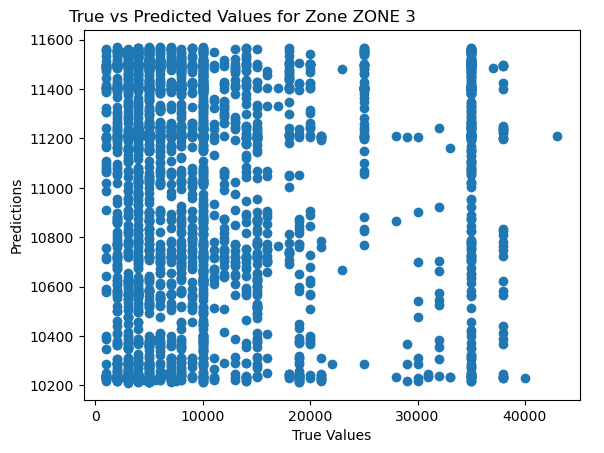

Zone: ZONE 7                                  
Mean Squared Error: 21719568.909342986


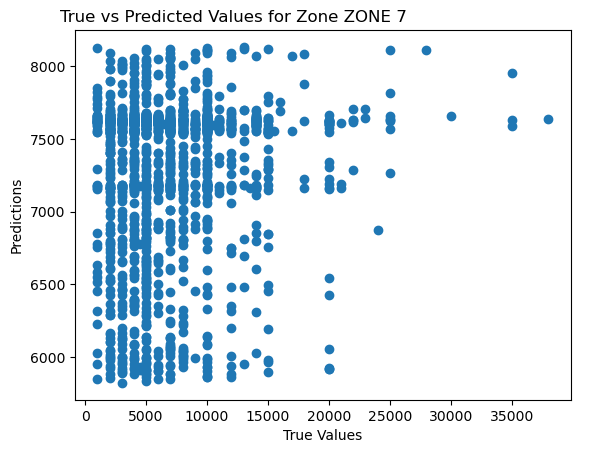

Zone: ZONE 10                                 
Mean Squared Error: 75095769.96811317


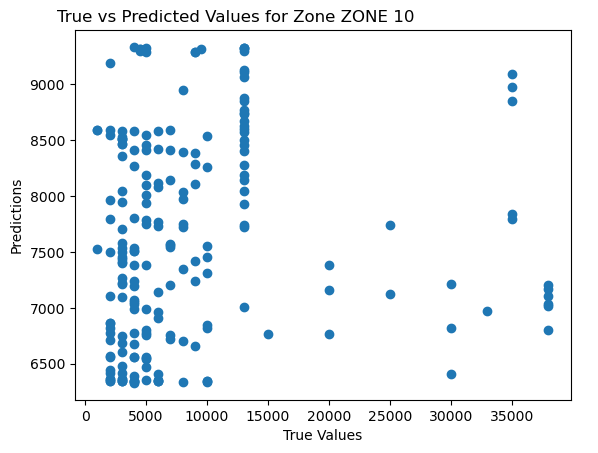

Zone: ZONE 11                                 
Mean Squared Error: 38604771.69333229


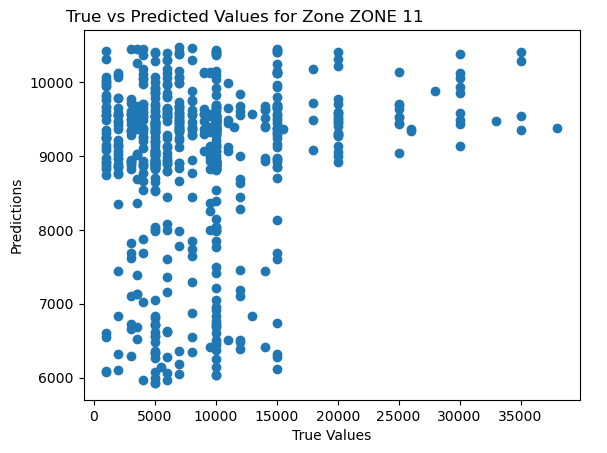

In [12]:
# Chargement des données
df_agregat = pd.read_excel("C:\\Users\\MM_DATA\\Desktop\\PIST\\Prediction\\Etat_des_sorties_final.xlsx")

# Séparer les données en fonction des zones
zones = df_agregat['ZONE'].unique()

# Parcourir chaque zone et entraîner un modèle de régression
for zone in zones:
    # Sélectionner les données pour la zone spécifique
    df_zone = df_agregat[df_agregat['ZONE'] == zone]
    
    # Supprimer les colonnes non numériques
    df_zone_numerique = df_zone.select_dtypes(include=['number'])
    
    # Diviser les données en ensemble d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
    X = df_zone_numerique.drop(['VOLUME'], axis=1)  # Caractéristiques (toutes les colonnes numériques sauf 'VOLUME')
    y = df_zone_numerique['VOLUME']  # Variable cible ('VOLUME')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entraîner un modèle de régression linéaire
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Évaluer les performances du modèle
    mse = mean_squared_error(y_test, y_pred)
    print("Zone:", zone)
    print("Mean Squared Error:", mse)
    
    # Afficher les prédictions par rapport aux vraies valeurs
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("True vs Predicted Values for Zone {}".format(zone))
    plt.show()


Zone: ZONE 5                                  
Mean Squared Error: 25149667.478866916


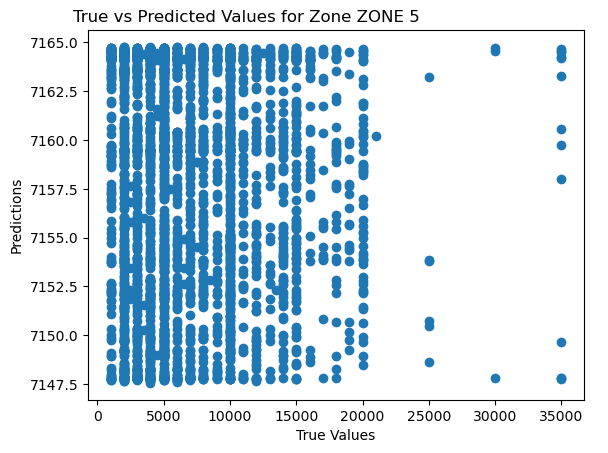

          Date  True Values  Predictions
261605  261605         5000  7164.564771
296315  296315        12000  7164.271839
157626  157626         7000  7159.460106
31859    31859        14000  7148.377651
111895  111895        15000  7155.431272
...        ...          ...          ...
263751  263751         2000  7164.588491
291404  291404         6000  7164.192318
32840    32840        12000  7148.503614
147810  147810         4000  7159.245079
296423  296423         1000  7164.227701

[3181 rows x 3 columns]
Zone: ZONE 8                                  
Mean Squared Error: 39768418.55212606


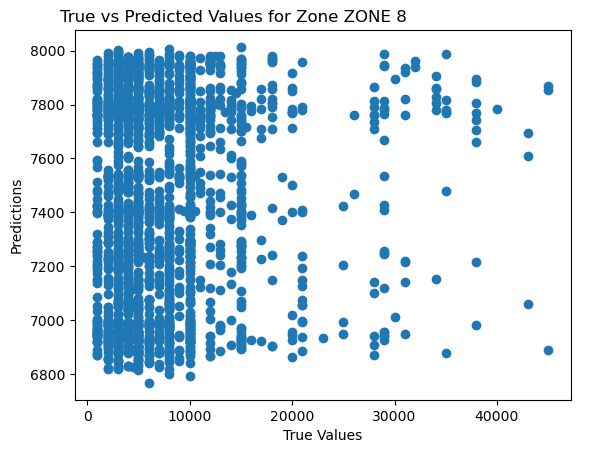

          Date  True Values  Predictions
248809  248809        20000  7769.755585
94412    94412         8000  7389.743938
8601      8601         5000  7128.886749
181009  181009         4000  7744.104035
42298    42298         7000  6934.073227
...        ...          ...          ...
205680  205680         7000  7841.590721
34002    34002        10000  6923.234420
105419  105419         5000  7414.963977
262846  262846         2000  7535.091483
178703  178703        10000  7752.918395

[2249 rows x 3 columns]
Zone: ZONE 2                                  
Mean Squared Error: 53388683.145925574


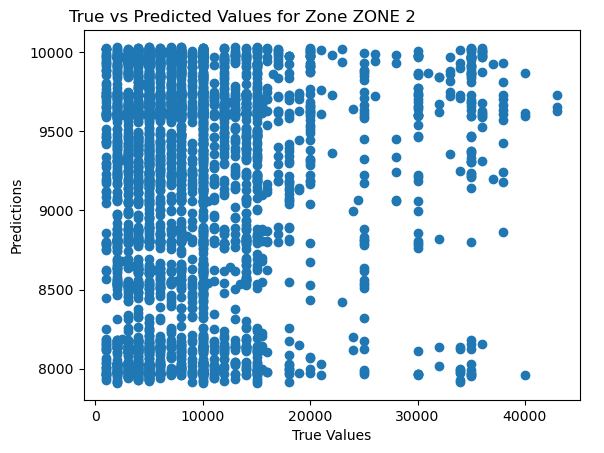

          Date  True Values  Predictions
160766  160766         8000  9659.639389
61109    61109         3000  8258.751963
143436  143436         2000  9678.328571
39310    39310         6000  8031.929474
37059    37059         3000  8022.395869
...        ...          ...          ...
206642  206642        14000  9908.883730
195282  195282        10000  9743.296560
55355    55355         2000  8157.149620
97713    97713        32000  8818.906308
19397    19397         5000  7962.645047

[3708 rows x 3 columns]
Zone: ZONE 13                                 
Mean Squared Error: 114197943.8442285


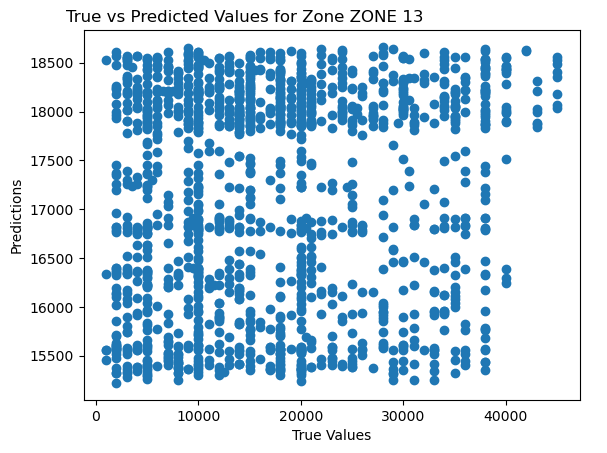

          Date  True Values   Predictions
88360    88360        15000  16781.373300
231313  231313        14000  18153.568406
186453  186453        13000  17883.589843
91030    91030         3000  16838.178261
189680  189680        14000  17979.141816
...        ...          ...           ...
214203  214203         9000  18647.909182
141906  141906        15000  18463.738778
15754    15754         2000  15569.198894
96029    96029         2000  16788.926278
117386  117386        10000  17319.738281

[1493 rows x 3 columns]
Zone: ZONE 1                                  
Mean Squared Error: 109759344.88190512


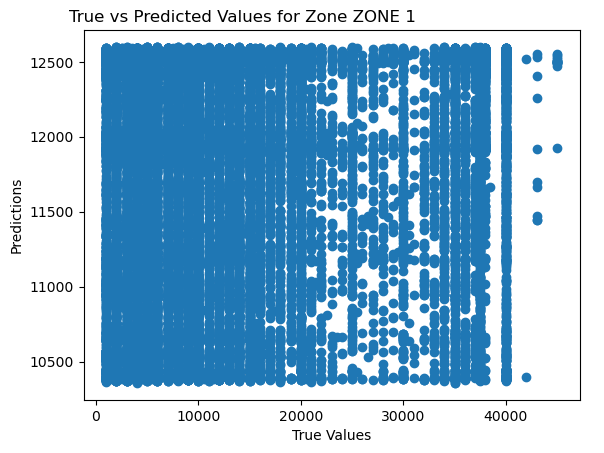

          Date  True Values   Predictions
18384    18384         3000  10397.780007
206722  206722        21000  12303.183381
143195  143195        15000  11823.987063
209656  209656         8000  12346.337019
40594    40594        10000  10534.727346
...        ...          ...           ...
198354  198354        10000  12213.842319
175711  175711        10000  12002.095891
201219  201219         6000  12243.342563
92973    92973         5000  11183.188334
231730  231730         9000  12458.305730

[36255 rows x 3 columns]
Zone: ZONE 12                                 
Mean Squared Error: 84729650.39589614


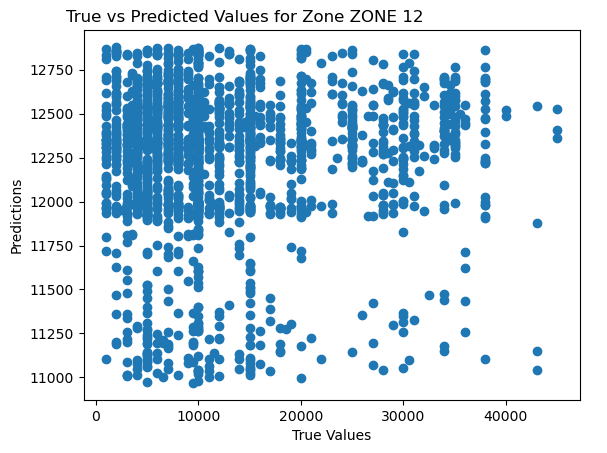

          Date  True Values   Predictions
181901  181901        16000  12449.256412
15864    15864        10000  12094.327389
230360  230360        15000  12399.364201
28067    28067        20000  11960.665859
168399  168399        13000  12557.147131
...        ...          ...           ...
221502  221502         4000  12543.518362
135547  135547        34000  12694.483682
62427    62427         3500  12090.562728
210235  210235        12000  12621.217803
170134  170134         6000  12525.546882

[1973 rows x 3 columns]
Zone: ZONE 4                                  
Mean Squared Error: 43460469.15372408


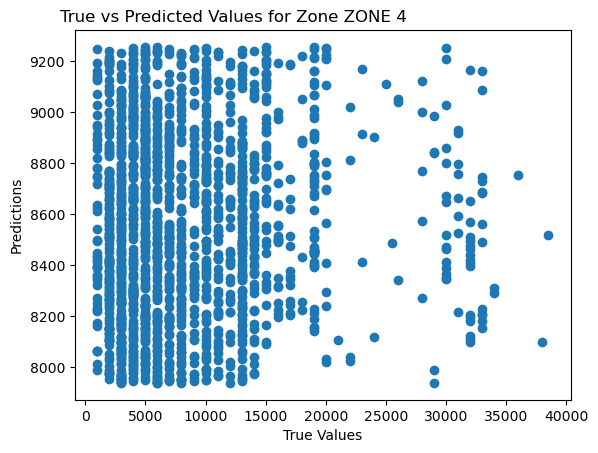

          Date  True Values  Predictions
40423    40423         8000  8126.284626
35493    35493         2000  8104.294088
300812  300812         4000  9251.537538
31134    31134         2000  8087.154864
275614  275614        10000  9124.944050
...        ...          ...          ...
218363  218363         7000  8844.334356
231729  231729        10000  8907.942510
238381  238381         7000  8937.756936
96796    96796        12000  8347.377282
185922  185922        13000  8714.615781

[1847 rows x 3 columns]
Zone: ZONE 9                                  
Mean Squared Error: 37053632.128684536


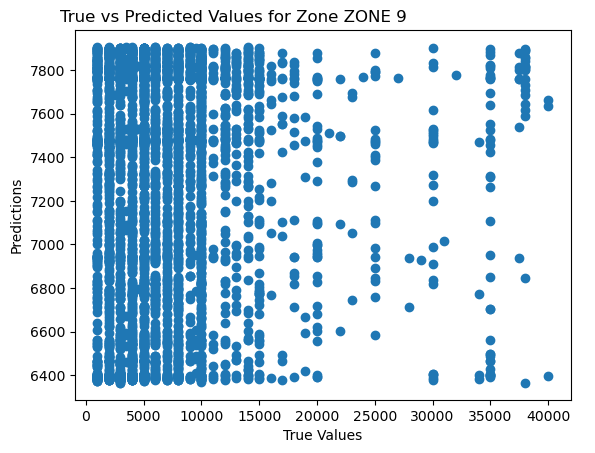

          Date  True Values  Predictions
135065  135065         2000  7326.780776
57624    57624         4000  6582.322610
232676  232676        35000  7817.686908
256579  256579         5000  7893.253482
116635  116635         2000  7124.583744
...        ...          ...          ...
109438  109438        10000  7056.084301
273423  273423        10000  7807.757322
6671      6671         7000  6393.125985
55760    55760         4000  6570.001977
140395  140395        10000  7408.662234

[4101 rows x 3 columns]
Zone: ZONE 6                                  
Mean Squared Error: 10473180.332964607


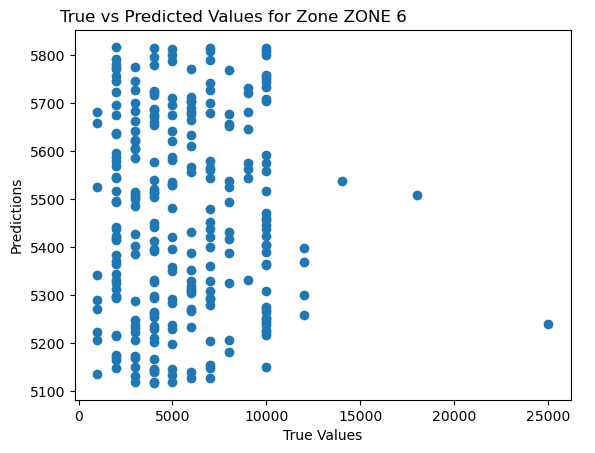

          Date  True Values  Predictions
47794    47794         2000  5217.625106
120858  120858         3000  5402.206010
82018    82018         6000  5304.216967
66724    66724         6000  5266.451340
45553    45553         4000  5211.481708
...        ...          ...          ...
229270  229270         6000  5664.003193
42962    42962         3000  5205.353657
173429  173429         5000  5529.801485
79120    79120         4000  5297.413871
49739    49739        10000  5222.499716

[264 rows x 3 columns]
Zone: ZONE 3                                  
Mean Squared Error: 99102058.29991488


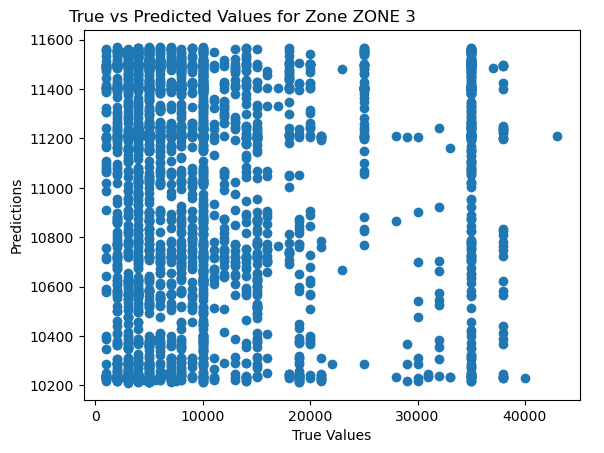

          Date  True Values   Predictions
18208    18208         7000  10219.606140
177035  177035        38000  11239.088390
15808    15808        14000  10216.024445
28418    28418         4000  10235.672500
25173    25173         4000  10234.891513
...        ...          ...           ...
252763  252763        13000  11562.316058
33969    33969         3000  10264.143637
152074  152074        35000  11214.815082
243261  243261        35000  11542.437045
125734  125734        10000  11011.641422

[2820 rows x 3 columns]
Zone: ZONE 7                                  
Mean Squared Error: 21719568.909342986


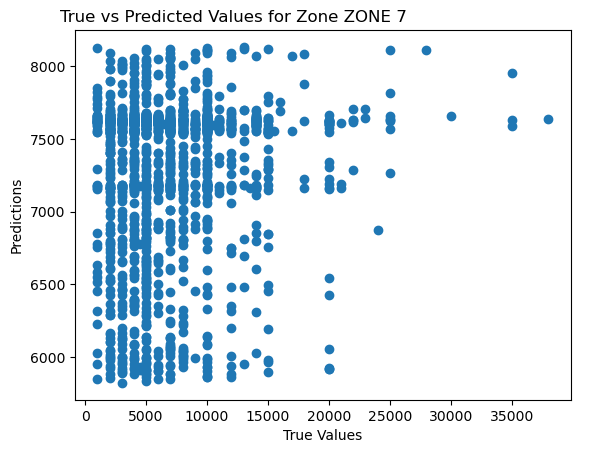

          Date  True Values  Predictions
194415  194415         3000  7181.361738
96482    96482         9000  7572.231551
260713  260713        14000  6606.882137
66844    66844         2000  7667.645268
267206  267206         5000  6467.641934
...        ...          ...          ...
199729  199729         6000  7179.385941
146429  146429        15000  7627.179032
132646  132646        10000  7609.712606
220999  220999         8000  7083.486388
151261  151261         8000  7571.996916

[1552 rows x 3 columns]
Zone: ZONE 10                                 
Mean Squared Error: 75095769.96811317


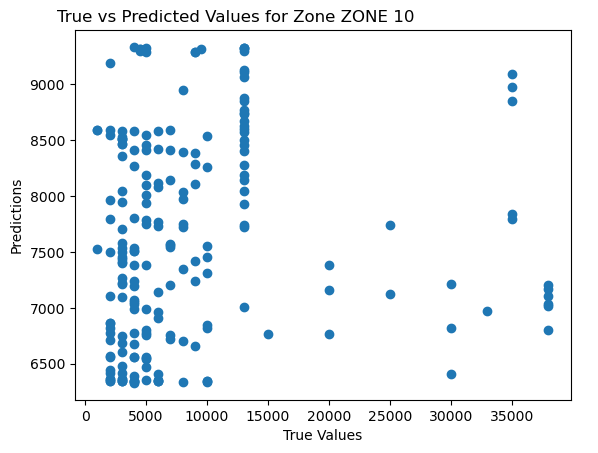

          Date  True Values  Predictions
154067  154067         5000  8409.781818
96862    96862         3000  7452.448072
40200    40200         5000  6563.688295
119177  119177         4000  7805.626378
216114  216114        35000  9090.651150
...        ...          ...          ...
71113    71113        38000  7103.417570
72111    72111         2000  7103.730813
165057  165057         5000  8456.409200
156480  156480         4000  8413.294483
135924  135924         7000  8146.147958

[203 rows x 3 columns]
Zone: ZONE 11                                 
Mean Squared Error: 38604771.69333229


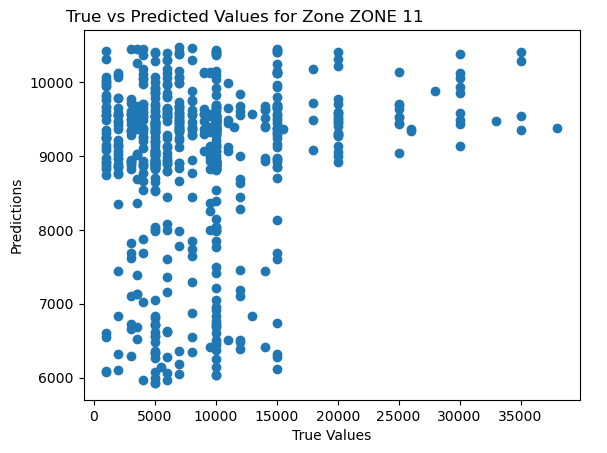

          Date  True Values   Predictions
105026  105026         5000   9458.671605
102420  102420        11000   9493.235739
81385    81385        15000   9369.351857
47043    47043         2000   8971.334231
111932  111932         7000   9683.063261
...        ...          ...           ...
74952    74952         7000   9358.006995
128128  128128         7000  10052.219874
287702  287702        10000   6505.086049
138176  138176         1000  10309.296216
59545    59545         4000   8874.150058

[639 rows x 3 columns]


In [15]:
# Chargement des données
df_agregat = pd.read_excel("C:\\Users\\MM_DATA\\Desktop\\PIST\\Prediction\\Etat_des_sorties_final.xlsx")

# Convertir la colonne de dates en format datetime
df_agregat['DATE'] = pd.to_datetime(df_agregat['DATE'])

# Séparer les données en fonction des zones
zones = df_agregat['ZONE'].unique()

# Parcourir chaque zone et entraîner un modèle de régression
for zone in zones:
    # Sélectionner les données pour la zone spécifique
    df_zone = df_agregat[df_agregat['ZONE'] == zone]
    
    # Supprimer les colonnes non numériques
    df_zone_numerique = df_zone.select_dtypes(include=['number'])
    
    # Diviser les données en ensemble d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
    X = df_zone_numerique.drop(['VOLUME'], axis=1)  # Caractéristiques (toutes les colonnes numériques sauf 'VOLUME')
    y = df_zone_numerique['VOLUME']  # Variable cible ('VOLUME')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entraîner un modèle de régression linéaire
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Évaluer les performances du modèle
    mse = mean_squared_error(y_test, y_pred)
    print("Zone:", zone)
    print("Mean Squared Error:", mse)
    
    # Afficher les prédictions par rapport aux vraies valeurs
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("True vs Predicted Values for Zone {}".format(zone))
    plt.show()
    
    # Afficher un tableau avec les dates, les vraies valeurs et les prédictions
    df_predictions = pd.DataFrame({'Date': X_test.index, 'True Values': y_test, 'Predictions': y_pred})
    print(df_predictions)


In [18]:
import pandas as pd

# Générer les dates jusqu'en 2028
dates_2028 = pd.date_range(start='2024-01-01', end='2028-12-31', freq='D')

# Créer un DataFrame à partir des dates
df_dates = pd.DataFrame({'Date': dates_2028})

# Afficher les premières lignes du DataFrame
print(df_dates.head())


        Date
0 2024-01-01
1 2024-01-02
2 2024-01-03
3 2024-01-04
4 2024-01-05
